# Optimization of Logistic Regression with Tensorflow

# Index

1. Create Data

2. Split data into training data, validation data, and test data.

3. Logistic Regression with TensorFlow

4. Training

5. Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/Colab/study/metacode/creditcard/

/content/drive/MyDrive/Colab/study/metacode/creditcard


In [ ]:
# Basic setting
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Check tensorflow version
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.17.0


# [1] Create Data

In [ ]:
np.random.seed(0)
X = np.random.rand(10000, 2) * 10
# 첫 번째 특징과 두 번째 특징의 합이 10보다 크면 클래스 1, 그렇지 않으면 0
Y = (X[:, 0] + X[:, 1] > 10).astype(np.float32).reshape(-1, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

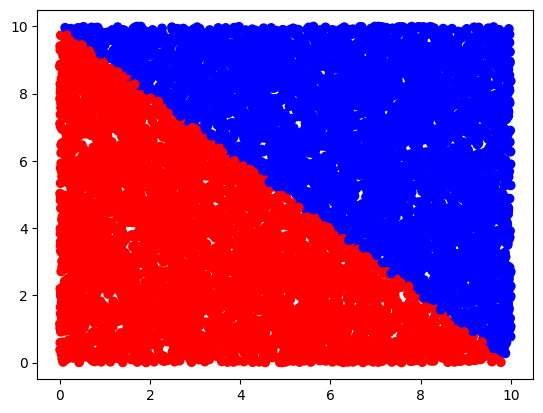

In [ ]:
colors=['red' if i == 0 else 'blue' for i in Y]
plt.scatter(X[:, 0], X[:, 1], label='Logistic regression', color=colors)
plt.show

# [2] Split data into training data, validation data, and test data.

In [ ]:
# Use sklearn library
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [ ]:
# train : valid : test = 60 : 20 : 20
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.25, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

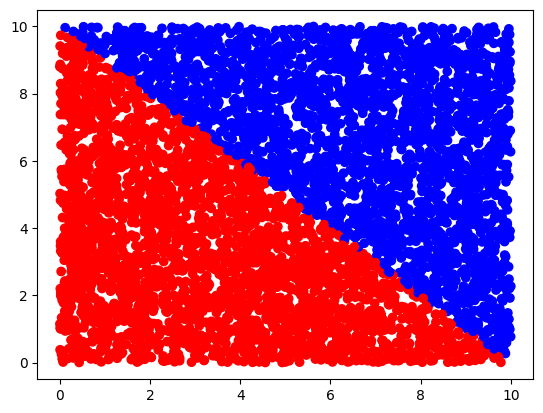

In [ ]:
# train dataset 시각화(visualization)
colors=['red' if i == 0 else 'blue' for i in Y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], label='Logistic regression', color=colors)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

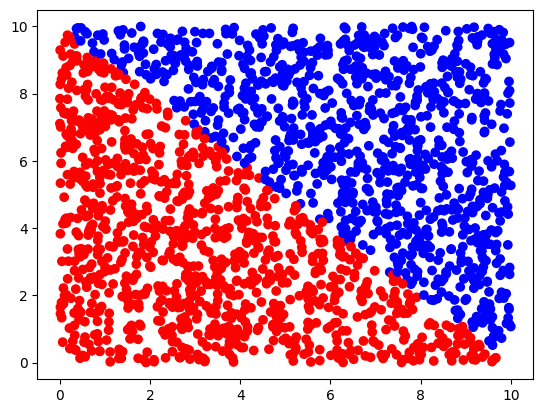

In [ ]:
# valid dataset 시각화(visualization)
colors=['red' if i == 0 else 'blue' for i in Y_val]
plt.scatter(X_val[:, 0], X_val[:, 1], label='Logistic regression', color=colors)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

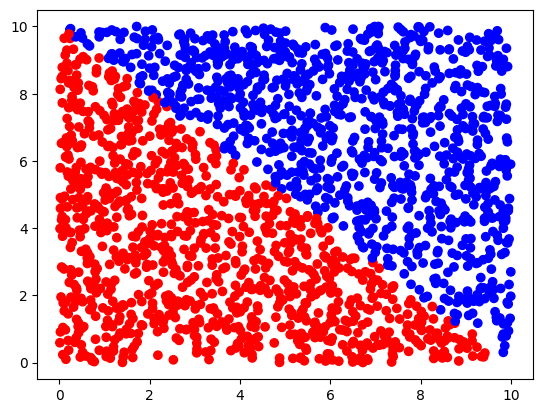

In [ ]:
# test dataset 시각화(visualization)
colors=['red' if i == 0 else 'blue' for i in Y_test]
plt.scatter(X_test[:, 0], X_test[:, 1], label='Logistic regression', color=colors)
plt.show

# [3] Logistic Regression with <font color=red>TensorFlow</font>

**Logistic function(Sigmoid function)**
- $x_j$: $X_i$의 $j$번째 특징(feature) 값을 의미
- $W_j$: 각각의 특징에 대한 가중치
- $b$: 편향(bias)

\begin{equation*}
z = W_1 \cdot x_1 + W_2 \cdot x_2+ \cdot \cdot \cdot +W_p\cdot x_p + b
\end{equation*}

\begin{equation*}
h(X_i) = \hat{y} = sigmoid(z) = \frac{1}{1 + e^{-z}}
\end{equation*}

**손실 함수 (Binary Cross-Entropy Loss)**
\begin{equation*}
L(y_{\text{pred}}, y_{\text{true}}) = -\frac{1}{m} \sum_{i=1}^{m} \left( y_{\text{true}}^{(i)} \cdot \log(y_{\text{pred}}^{(i)}) + (1 - y_{\text{true}}^{(i)}) \cdot \log(1 - y_{\text{pred}}^{(i)}) \right)
\end{equation*}

\begin{equation*}
L(W, b) = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(h(X_i)) + (1 - y_i) \log(1 - h(X_i)) \right)
\end{equation*}

In [ ]:
# Model weights and bias parameters 초기화
W = tf.Variable(tf.random.normal([2, 1], stddev=1), name='weight')
b = tf.Variable(tf.random.normal([1], stddev=1), name='bias')

In [ ]:
# 로지스틱 함수 (시그모이드 함수) 정의
def hypothesis(x):
  x = tf.cast(x, dtype=tf.float32)
  z = tf.matmul(x, W) + b
  return tf.sigmoid(z)

In [ ]:
# 손실 함수 정의 (Binary Cross-Entropy Loss)
def loss_fn(y_pred, y_true):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

In [ ]:
# 최적화 알고리즘(SGD)
optimizer = tf.optimizers.SGD(learning_rate=0.1)

In [ ]:
# 학습 함수 정의
def train(X, Y):
  with tf.GradientTape() as g:
    pred = hypothesis(X)
    loss = loss_fn(pred, Y)

  gradients = g.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

  return loss

# [4] Training

In [ ]:
# training setting
epochs = 4001

train_losses = []
val_losses = []

for epoch in range(epochs):
  train_loss = train(X_train, Y_train)
  train_losses.append(train_loss)

  # validation
  val_pred = hypothesis(X_val)
  val_loss = loss_fn(val_pred, Y_val)
  val_losses.append(val_loss)

  # display
  if epoch % 100 == 0:
    print(f"Epoch {epoch + 1}, Training Loss: {train_loss.numpy():.6f}, Validation Loss: {val_loss.numpy():.6f}, W: {W.numpy()}, b: {b.numpy()}")

Epoch 1, Training Loss: 1.870884, Validation Loss: 1.719320, W: [[-0.86204624]
 [ 1.1694617 ]], b: [-0.97034085]
Epoch 101, Training Loss: 0.422775, Validation Loss: 0.426379, W: [[0.23406327]
 [0.23620054]], b: [-1.957365]
Epoch 201, Training Loss: 0.364482, Validation Loss: 0.368287, W: [[0.30492157]
 [0.30687103]], b: [-2.7113044]
Epoch 301, Training Loss: 0.325836, Validation Loss: 0.329604, W: [[0.36342746]
 [0.3650605 ]], b: [-3.3257291]
Epoch 401, Training Loss: 0.298147, Validation Loss: 0.301795, W: [[0.4134192 ]
 [0.41468498]], b: [-3.8460915]
Epoch 501, Training Loss: 0.277169, Validation Loss: 0.280673, W: [[0.4572272 ]
 [0.45811316]], b: [-4.2991834]
Epoch 601, Training Loss: 0.260607, Validation Loss: 0.263964, W: [[0.49634778]
 [0.49685946]], b: [-4.701861]
Epoch 701, Training Loss: 0.247117, Validation Loss: 0.250334, W: [[0.53179157]
 [0.5319424 ]], b: [-5.0653386]
Epoch 801, Training Loss: 0.235858, Validation Loss: 0.238945, W: [[0.5642714]
 [0.5640785]], b: [-5.3974

# [5] Visualization

Visualizing learning outcomes

In [ ]:
# w1*x1 + w2*x2 + b = 0
# yhat = x2 = -w1/w2 * x1 - b/w2
w1 = W.numpy()[0][0]
w2 = W.numpy()[1][0]

slope = -w1 / w2
bias = -b / w2

<function matplotlib.pyplot.show(close=None, block=None)>

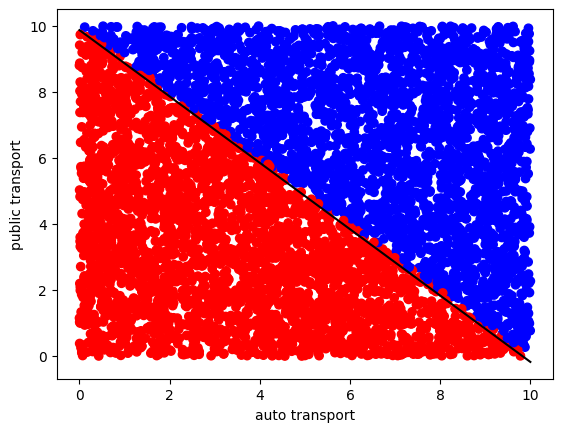

In [ ]:
# Visualize the trained logistic regression model
x_values = np.linspace(np.min(X_train), np.max(X_train))
y_values = slope * x_values + bias

colors=['red' if i == 0 else 'blue' for i in Y_train]
plt.xlabel("auto transport")
plt.ylabel("public transport")
plt.scatter(X_train[:, 0], X_train[:, 1], label='Logistic regression', color=colors)
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.show

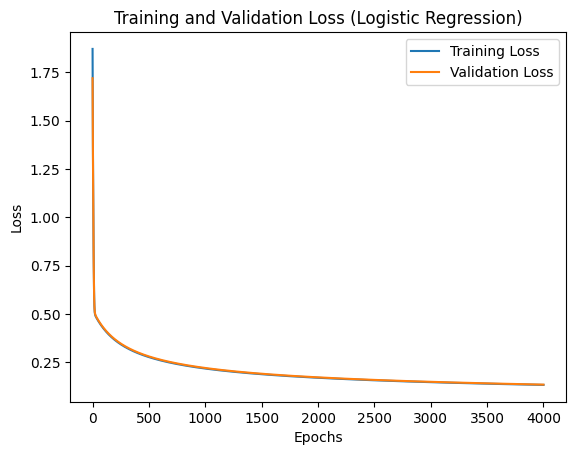

In [ ]:
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Logistic Regression)')
plt.show()

Test visualization

In [ ]:
test_pred = hypothesis(X_test)
test_loss = loss_fn(test_pred, Y_test)
print(f"\nTest Loss: {test_loss.numpy():.4f}")


Test Loss: 0.1294


In [ ]:
def accuracy(y_pred, y_true):
  y_pred = tf.cast(y_pred > 0.5, dtype=tf.float32)
  return tf.reduce_mean(tf.cast(tf.equal(y_pred, y_true), dtype=tf.float32))

print(f"Accuracy: {accuracy(test_pred, Y_test).numpy():.4f}")

Accuracy: 0.9885


<function matplotlib.pyplot.show(close=None, block=None)>

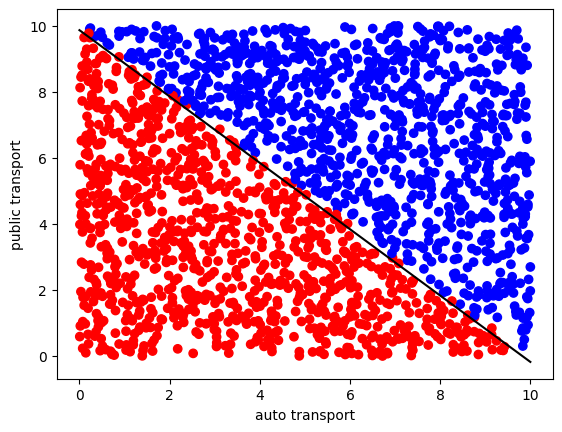

In [ ]:
x_values = np.linspace(np.min(X_test), np.max(X_test))
y_values = slope * x_values + bias

colors=['red' if i == 0 else 'blue' for i in Y_test]
plt.xlabel("auto transport")
plt.ylabel("public transport")
plt.scatter(X_test[:, 0], X_test[:, 1], label='Logistic regression', color=colors)
plt.plot(x_values, y_values, label='Decision Boundary', color='black')
plt.show